In [312]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn.metrics import mean_squared_error,accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn. import LinearSVC
from sklearn.linear_model import LinearRegression

In [313]:
boston=datasets.load_boston()

In [314]:
print(boston.data.shape)

(506, 13)


In [315]:
print(boston.target.shape)

(506,)


In [316]:
print(boston.feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [317]:
print(boston.target)

[24.  21.6 34.7 33.4 36.2 28.7 22.9 27.1 16.5 18.9 15.  18.9 21.7 20.4
 18.2 19.9 23.1 17.5 20.2 18.2 13.6 19.6 15.2 14.5 15.6 13.9 16.6 14.8
 18.4 21.  12.7 14.5 13.2 13.1 13.5 18.9 20.  21.  24.7 30.8 34.9 26.6
 25.3 24.7 21.2 19.3 20.  16.6 14.4 19.4 19.7 20.5 25.  23.4 18.9 35.4
 24.7 31.6 23.3 19.6 18.7 16.  22.2 25.  33.  23.5 19.4 22.  17.4 20.9
 24.2 21.7 22.8 23.4 24.1 21.4 20.  20.8 21.2 20.3 28.  23.9 24.8 22.9
 23.9 26.6 22.5 22.2 23.6 28.7 22.6 22.  22.9 25.  20.6 28.4 21.4 38.7
 43.8 33.2 27.5 26.5 18.6 19.3 20.1 19.5 19.5 20.4 19.8 19.4 21.7 22.8
 18.8 18.7 18.5 18.3 21.2 19.2 20.4 19.3 22.  20.3 20.5 17.3 18.8 21.4
 15.7 16.2 18.  14.3 19.2 19.6 23.  18.4 15.6 18.1 17.4 17.1 13.3 17.8
 14.  14.4 13.4 15.6 11.8 13.8 15.6 14.6 17.8 15.4 21.5 19.6 15.3 19.4
 17.  15.6 13.1 41.3 24.3 23.3 27.  50.  50.  50.  22.7 25.  50.  23.8
 23.8 22.3 17.4 19.1 23.1 23.6 22.6 29.4 23.2 24.6 29.9 37.2 39.8 36.2
 37.9 32.5 26.4 29.6 50.  32.  29.8 34.9 37.  30.5 36.4 31.1 29.1 50.
 33.3 3

In [318]:
print('Target: 1:{},2:{},3:{}'.format(np.sum(boston.target==0),np.sum(boston.target==1),np.sum(boston.target==2)))

Target: 1:0,2:0,3:0


In [319]:


df=pd.DataFrame(boston.data)

In [320]:
print(df.head())

         0     1     2    3      4      5     6       7    8      9    10  \
0  0.00632  18.0  2.31  0.0  0.538  6.575  65.2  4.0900  1.0  296.0  15.3   
1  0.02731   0.0  7.07  0.0  0.469  6.421  78.9  4.9671  2.0  242.0  17.8   
2  0.02729   0.0  7.07  0.0  0.469  7.185  61.1  4.9671  2.0  242.0  17.8   
3  0.03237   0.0  2.18  0.0  0.458  6.998  45.8  6.0622  3.0  222.0  18.7   
4  0.06905   0.0  2.18  0.0  0.458  7.147  54.2  6.0622  3.0  222.0  18.7   

       11    12  
0  396.90  4.98  
1  396.90  9.14  
2  392.83  4.03  
3  394.63  2.94  
4  396.90  5.33  


In [321]:
df.columns=boston.feature_names
print(df.head())

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  
0     15.3  396.90   4.98  
1     17.8  396.90   9.14  
2     17.8  392.83   4.03  
3     18.7  394.63   2.94  
4     18.7  396.90   5.33  


In [322]:
df['Price']=boston.target
print(df.head())

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  Price  
0     15.3  396.90   4.98   24.0  
1     17.8  396.90   9.14   21.6  
2     17.8  392.83   4.03   34.7  
3     18.7  394.63   2.94   33.4  
4     18.7  396.90   5.33   36.2  


In [323]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [324]:
x_train,x_test,y_train,y_test=train_test_split(boston.data,boston.target,test_size=0.15,random_state=42)

In [325]:
scaler=StandardScaler()
x_train_std=scaler.fit_transform(x_train)
x_test_std=scaler.fit_transform(x_test)

In [326]:
print(x_train_std.shape)

(430, 13)


In [327]:
print(x_test_std.shape)

(76, 13)


In [328]:
print(y_train.shape)

(430,)


In [329]:
print(y_test.shape)

(76,)


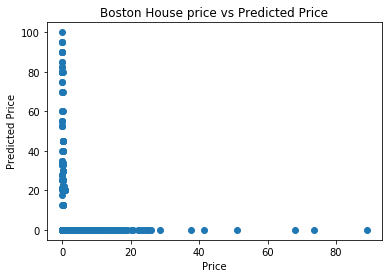

In [330]:
plt.scatter(x_train[:,:1],x_train[:,1:2])
plt.xlabel('Price')
plt.ylabel('Predicted Price')
plt.title("Boston House price vs Predicted Price")
plt.show()

In [331]:
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [332]:
y_pred=model.predict(x_test)

In [333]:
print(model.coef_)

[-1.21517043e-01  3.96125172e-02  3.23662355e-02  2.60242274e+00
 -1.96669495e+01  3.79922953e+00  2.41541545e-03 -1.56860280e+00
  3.20442973e-01 -1.16308521e-02 -9.63408389e-01  1.10202864e-02
 -5.52086533e-01]


In [334]:
print('Intercept:%.3f'%model.intercept_)

Intercept:37.378


In [335]:
y_pred=model.predict(x_test)

In [336]:
print(y_pred[:5])

[29.4299146  36.12913024 14.29515659 24.85869473 18.9459364 ]


Text(0.5, 1.0, 'Boston datasets prediction')

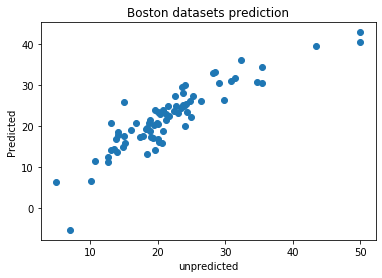

In [337]:
plt.scatter(y_test,y_pred)
plt.xlabel('unpredicted')
plt.ylabel('Predicted')
plt.title('Boston datasets prediction')

In [338]:
print(y_test)

[23.6 32.4 13.6 22.8 16.1 20.  17.8 14.  19.6 16.8 21.5 18.9  7.  21.2
 18.5 29.8 18.8 10.2 50.  14.1 25.2 29.1 12.7 22.4 14.2 13.8 20.3 14.9
 21.7 18.3 23.1 23.8 15.  20.8 19.1 19.4 34.7 19.5 24.4 23.4 19.7 28.2
 50.  17.4 22.6 15.1 13.1 24.2 19.9 24.  18.9 35.4 15.2 26.5 43.5 21.2
 18.4 28.5 23.9 18.5 25.  35.4 31.5 20.2 24.1 20.  13.1 24.8 30.8 12.7
 20.  23.7 10.8 20.6 20.8  5. ]


In [339]:
print(y_pred)

[29.4299146  36.12913024 14.29515659 24.85869473 18.9459364  23.33181044
 17.56304359 13.64580456 23.76767942 20.67064862 24.97566126 18.64115832
 -5.37529568 21.53577018 19.55628157 26.20738657 20.71765252  6.43165738
 40.54410761 17.84455626 27.23309618 30.3543635  11.18673244 23.7090171
 18.4391652  16.89075459 22.82856829 14.88561852 22.4084684  19.26626721
 23.20312101 25.09863053 25.77705635 18.73128221 17.35488263 16.92397997
 30.81465816 20.11645382 23.47005166 24.25945046 13.99527168 32.81595458
 42.84191019 17.36577587 27.36376775 17.65205456 14.17099713 25.45190626
 20.76675071 30.06772594 21.45925197 34.42220955 15.74704153 25.99425554
 39.49038628 22.82111596 19.13064128 33.1975165  24.9068507  13.02579225
 22.28159258 30.44316337 31.60763587 16.03484901 19.92414044 16.88585295
 20.74312801 26.06425151 31.03448877 12.3460523  20.398064   27.9487637
 11.35482353 15.73858043 23.76119167  6.26520854]


In [340]:
print("mean squared error:%.3f"%mean_squared_error(y_test,y_pred))

mean squared error:13.719


In [341]:
print("accuracy_score: %.3f"%model.score(x_test,y_test))

accuracy_score: 0.790
